In [ ]:
#数据中涉及到的货币---currency_name_in_following_data
'''
CNY = 人民币；OMR = 阿曼里亚尔；IRR = 伊朗里亚尔；THB = 泰铢；SYP = 叙利亚磅；MYR = 马来西亚令吉；
YER = 也门里亚尔；VND = 越南盾；IQR = 伊拉克第纳尔；PKR = 巴基斯坦卢比；KWD = 科威特第纳尔；
KHR = 柬埔寨瑞尔；UZS = 乌兹别克索姆；SGD = 新加坡币； INR = 印度卢比；BDT = 孟加拉达卡；
PHP = 菲律宾比索；JOD = 约旦第纳尔；LAK = 老挝基普；IDR = 印尼盾；KRW = 韩元；
KZT = 哈萨尔腾格；ADE=阿联酋迪拉姆；BHD=巴林第纳尔；LBP=黎巴嫩镑；TRY=土耳其里拉；TMT=土库曼斯坦马纳特；
SAR=沙特里亚尔；MVR=马尔代夫鲁菲亚；QAR=卡塔尔里亚尔；MMK=缅甸缅元；NPR=尼泊尔卢比；BND=文莱元；AFN=阿富汗-阿富汗尼
'''

In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#获取汇率数据
Exchange_rate_data = pd.read_csv('./Dollar-Exchange.csv')
df = pd.DataFrame(Exchange_rate_data)
df

,Date,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,MYR=X,YER=X,VND=X,ILS=X,...,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
0,1/1/2004,NaN,0.38,NaN,39.24,NaN,3.81,NaN,NaN,4.38,...,NaN,NaN,NaN,3.75,NaN,3.64,NaN,NaN,1.69,NaN
1,1/2/2004,8.27,0.38,8236.2,39.53,47.23,3.80,NaN,15147.0,4.40,...,1474.10,NaN,NaN,3.75,NaN,3.64,6.18,70.60,1.68,NaN
2,1/5/2004,8.27,0.38,8731.5,39.26,47.25,3.80,NaN,15148.0,4.37,...,1474.60,NaN,NaN,3.75,NaN,3.64,6.18,70.62,1.68,NaN
3,1/6/2004,8.27,0.38,8724.7,39.03,47.21,3.80,NaN,15150.0,4.37,...,1473.80,NaN,NaN,3.75,NaN,3.64,6.18,70.58,1.68,NaN
4,1/7/2004,8.27,0.38,8728.7,38.97,47.22,3.81,NaN,15153.0,4.39,...,1474.30,NaN,NaN,3.75,NaN,3.64,6.18,70.60,1.68,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,12/26/2022,6.99,0.38,41300.0,34.61,NaN,4.42,249.85,23560.0,3.50,...,1507.00,18.62,3.36,3.76,15.34,3.64,2079.01,130.90,1.33,85.0
4952,12/27/2022,6.96,0.38,41300.0,34.66,NaN,4.42,249.85,23590.0,3.49,...,1506.00,18.66,3.36,3.76,15.34,3.64,2078.15,130.87,1.33,86.0
4953,12/28/2022,6.96,0.38,41400.0,34.62,NaN,4.42,250.00,23580.0,3.52,...,1507.03,18.66,3.35,3.75,15.35,3.64,2080.14,131.02,1.32,85.0
4954,12/29/2022,6.98,0.38,41350.0,34.70,NaN,4.42,250.00,23620.0,3.54,...,1507.00,18.69,3.35,3.75,15.35,3.64,2080.79,131.02,1.32,85.0


In [3]:
#查询相关信息，根据count项可分析出存在数据缺失
df.describe()

,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,MYR=X,YER=X,VND=X,ILS=X,JPY=X,...,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
count,4941.000000,4946.000000,4141.000000,4927.000000,3247.000000,4948.000000,4726.000000,4949.000000,4926.000000,4928.000000,...,4919.000000,4680.000000,3419.000000,4923.000000,4550.000000,4943.000000,4935.000000,4918.000000,4923.000000,2935.000000
mean,6.886448,0.379990,21800.876165,33.589533,148.981478,3.712427,220.234922,19962.675518,3.780292,105.754261,...,1489.697073,3.802132,3.177078,3.748661,14.314125,3.629749,743.274424,90.672349,1.363914,127.300750
std,0.647358,0.000817,15063.854790,3.105895,184.528112,0.450958,27.434909,3036.422619,0.375456,13.616954,...,54.961968,3.820930,0.267509,0.008688,1.197709,0.040454,683.615046,19.755909,0.170233,1677.829053
min,5.860000,0.370000,40.000000,28.070000,41.020000,2.900000,0.100000,20.890000,3.080000,75.740000,...,0.880000,1.140000,2.080000,3.300000,12.000000,3.000000,6.050000,61.430000,0.660000,17.600000
25%,6.380000,0.380000,9113.000000,31.270000,46.980000,3.270000,199.750000,16525.000000,3.510000,98.927500,...,1475.695000,1.510000,2.850000,3.750000,12.650000,3.640000,6.310000,70.560000,1.290000,51.280000
50%,6.780000,0.380000,11169.000000,32.750000,50.370000,3.750000,214.750000,20912.000000,3.720000,108.275000,...,1499.900000,2.085000,3.350000,3.750000,15.150000,3.640000,945.640000,93.580000,1.350000,67.520000
75%,7.070000,0.380000,42000.000000,35.150000,99.370000,4.140000,249.750000,22675.000000,3.940000,113.742500,...,1507.000000,4.740000,3.400000,3.750000,15.210000,3.640000,1340.000000,107.377500,1.430000,77.000000
max,8.280000,0.390000,90000.000000,42.100000,514.000000,4.750000,250.800000,24871.000000,4.730000,150.180000,...,1533.500000,18.700000,3.850000,3.780000,15.850000,3.900000,2090.550000,131.330000,1.710000,50235.000000


In [4]:
#数据完整度分析
def data_integrity_describe(df):
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        '变量': variables, 
        '数据类型': dtypes,
        '总数': count,
        '完整数据数': unique,
        '缺失数据数': missing
    })    
        
    return output

data_integrity_describe(df)

,变量,数据类型,总数,完整数据数,缺失数据数
0,Date,object,4956,4956,0
1,CNY=X,float64,4956,209,15
2,OMR=X,float64,4956,4,10
3,IRR=X,float64,4956,1950,815
4,THB=X,float64,4956,1104,29
5,SYP=X,float64,4956,847,1709
6,MYR=X,float64,4956,182,8
7,YER=X,float64,4956,253,230
8,VND=X,float64,4956,2423,7
9,ILS=X,float64,4956,167,30


In [5]:
#处理时间格式
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [6]:
#这里先提取人民币进行分析
df_CNY = df[['Date','CNY=X']]
df_CNY.dropna(inplace = True)
df_CNY.reset_index(inplace = True)

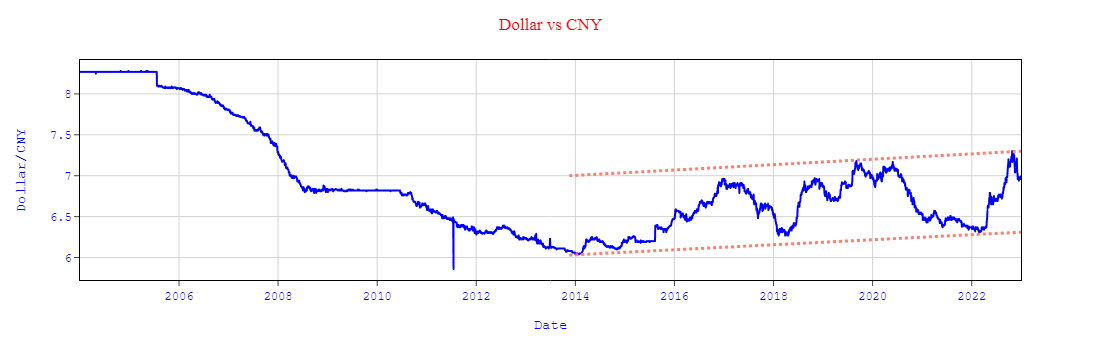

<Figure size 2400x2000 with 0 Axes>

In [7]:
#基于plotly的视图
plt.figure(figsize=(12,10),dpi=200)
plot = px.line(x=df_CNY['Date'], y=df_CNY['CNY=X'])
plot.update_traces(line_color='blue', line_width=2)
plot.update_layout(
    plot_bgcolor='white',
    title="Dollar vs CNY",
    title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Dollar/CNY",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
)
plot.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
plot.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
plot.add_shape( 
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0.52, x1=1, xref="paper", y0=6.03, y1=6.31, yref="y"
)
plot.add_shape( 
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0.52, x1=1, xref="paper", y0=7, y1=7.3, yref="y"
)

plt.tight_layout()
plot.show()